In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 43절: 선형회귀분석의 소개
# 선형회귀분석의 기초

회귀분석(regression analysis)은 독립변수 x 와 이에 대응하는 실수 종속변수 y 간의 관계를 정량화하는 작업

- 결정론적 모형(Deterministic Model): 단순히 독립 변수 x 에 대해 대응하는 종속변수 y 와 가장 비슷한 값 y^ 를 출력하는 함수 f(x) 를 찾는 과정
- 확률적 모형(Probabilistic Model)



* 선형회귀분석(linear regression analysis) :  함수 f(x) 가 선형 함수 
$w_0$ 계수(coefficient)이자 이 선형회귀모형의 모수(parameter)

$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_K x_K$

## 오그멘테이션 (Augmentation)

상수항이 0이 아닌 회귀분석모형인 경우에는 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수에 추가한다. 

$x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iK}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iK}
\end{bmatrix}$

모든 원소가 1인 벡터가 입력 데이터 행렬에 추가되고 이렇게 되면 전체 수식이 다음과 같이 가중치 벡터와 입력 데이터 벡터의 내적으로 간단히 표시된다.

In [1]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10, coef=True, random_state=1)

In [2]:
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [5]:
# 오그멘테이션
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [11]:
# StatsModels의 add_constant 함수 사용
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## OLS (Ordinary Least Squares)

잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법

잔차 벡터, 잔차제곱합, 행렬 미분으로 구한 gradient, 최적화 조건

그레디언트를 나타내는 식은 정규 방정식(Normal equation), 정규방정식에서 잔차 벡터가 모든 데이터 벡터들과 각각 직교함


In [12]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [13]:

# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("w:\n", w)

w:
 [[ 102.02701439]
 [  81.59750943]]


In [14]:
# lstsq 명령을 이용하는 방법 (y = xb를 만족하는 최소제곱해를 구함)
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

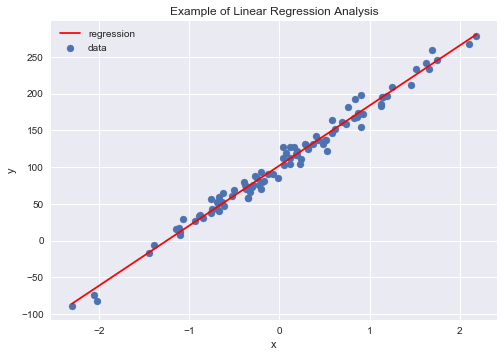

In [15]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

## Scikit-Learn 패키지를 사용한 선형회귀분석

linear_model 서브 패키지의 LinearRegression 클래스를 사용

1) LinearRegression 클래스 객체 생성

> model = LinearRegression(fit_intercept=True)

상수항이 없으면 fit_intercept=False로 설정한다.

2) fit 메서드로 모형 추정. 오그멘테이션을 자동으로 해주므로 사용자가 오그멘테이션을 할 필요는 없다.

>model.fit(X, y)

회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 된다.

- coef_ : 추정된 가중치 벡터
- intercept_ : 추정된 상수항

3) predict 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측

>  y_new = model.predict(x_new)

###  보스턴 집값 데이터를 사용하여 회귀분석

In [16]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

print(model_boston.coef_)
print(model_boston.intercept_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


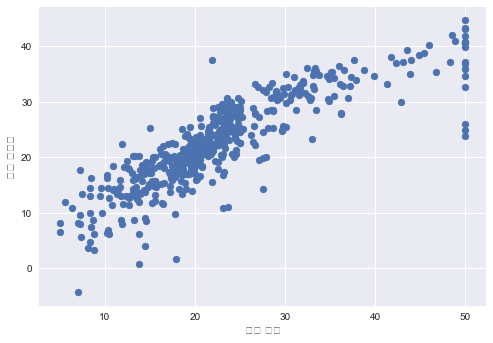

In [18]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel("실제 집값")
plt.ylabel("집값 예측치")
plt.show()

## StatsModels 를 사용한 선형회귀분석

OLS 클래스를 사용하여 선형회귀분석을 실시

1) OLS 클래스 객체 생성. 이 때 Scikit-Learn 패키지와 달리 데이터를 미리 주어야 하며 자동으로 상수항을 만들어주지 않기 때문에 사용자가 add_constant 명령으로 상수항을 추가해야 한다. 또한 인수의 순서가 Scikit-Learn 패키지와 달리 출력 데이터를 먼저 넣어야 한다.

> model = OLS(y, X)

2) fit 메서드로 모형 추정. Scikit-Learn 패키지와 달리 추정 결과는 별도의 RegressionResults 클래스 객체로 출력된다.

> result = model.fit()

3) RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공한다.

> print(result.summary())
y_new = result.predict(x_new)

이 때, 예측을 위한 데이터는 추정시와 동일하게 오그멘테이션을 해 주어야 한다.

In [19]:

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEKV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEKV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 03 Oct 2017   Prob (F-statistic):          6.95e-135
Time:                        21:26:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

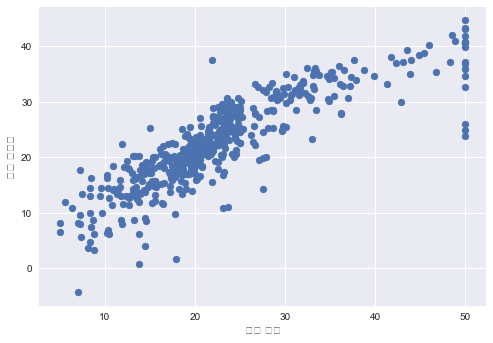

In [20]:

dfy_new = result_boston2.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel("실제 집값")
plt.ylabel("집값 예측치")
plt.show()

* 예측을 할 때는 입력 데이터가 추정모형과 동일한 형태가 되어야 한다. 예를 들어 다음과 같은 입력데이터를 생각해보자.

In [21]:
x_new = [4, 11, 11, 0.1, 0.6, 6, 70, 4, 10, 410, 20, 360, 13]

이 데이터는 원래 입력데이터의 평균값에서 힌트를 얻어 만든 가상의 데이터이다.

In [23]:
dfX0.mean()

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

다음과 같이 원래 데이터와 동일한 형태의 데이터프레임을 만들어야 한다. 여기에서 데이터 행이 하나인 경우에는 add_constant에 has_constant="add" 인수를 추가해야 한다.

In [24]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, columns=boston.feature_names), 
                          has_constant="add")
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,4.0,11.0,11.0,0.1,0.6,6.0,70.0,4.0,10.0,410.0,20.0,360.0,13.0


In [25]:
result_boston2.predict(dfx_new)

0    18.854172
dtype: float64

RegressionResults 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다. 자주 사용되는 속성으로는 다음과 같은 것들이 있다.

- resid: 잔차 벡터
- params: 모수 벡터
    
이외에도 여러가지 분석에 필요한 다양한 메서드도 제공한다.

In [27]:
result_boston2.params

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [28]:
result_boston2.resid.head()

0   -6.008213
1   -3.429861
2    4.129768
3    4.791859
4    8.257118
dtype: float64

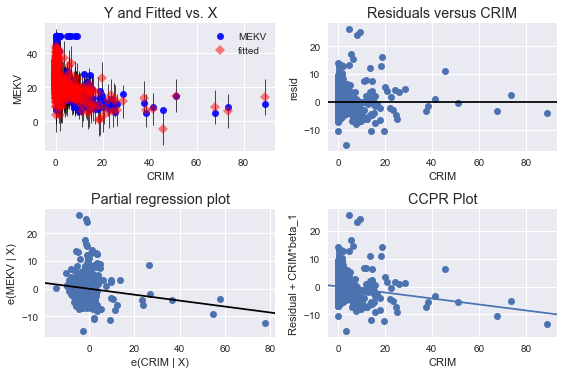

In [29]:
# 그밖에 StatsModels 패키지가 제공하는 분석용 함수
fig = sm.graphics.plot_regress_exog(result_boston2, "CRIM")
fig.suptitle("")
plt.show()

# 44절: 아웃라이어

# 레버리지와 아웃라이어

## 레버리지(Leverage)
개별적인 데이터 표본 하나하나가 회귀분석 결과에 미치는 영향력은 레버리지(leverage) 분석을 통해 알 수 있다.

레버리지는 실제 종속변수값 y 가 예측치(predicted target) y^ 에 미치는 영향을 나타낸 값이다. (self-influence, self-sensitivity)

$w = (X^TX)^{-1} X^T y$

$\hat{y} = X w = X((X^TX)^{-1} X^T y ) = ( X(X^TX)^{-1} X^T) y = Hy$

가중치 벡터의 결과값을 예측식에 대입  y, y^ 의 관계 를 알수 있다. <br>
이 행렬 H 를 영향도 행렬(influence matrix) 또는 hat 행렬(hat matrix)이라고 한다.

$\hat{y}_i = h_{i1} y_1 + h_{i2} y_2 + \cdots + h_{ii} y_i + \cdots + h_{iN} y_N$

$h_{ii} = 1, h_{ij} = 0 \; (\text{for } i \neq j) \;\; \rightarrow \;\; \hat{y}_i = y_i$

hii 값이 1이 되고 나머지 성분들이 모두 0이 되면 모든 표본 데이터에 대해 실제 결과값과 예측값이 일치하게 된다.

hat 행렬의 대각성분 hii 을 레버리지 라고 한다. 

* 레버리지: 실제의 결과값 yi 이 예측값 y^i 에 미치는 영향, 즉 예측점을 자기 자신의 위치로 끌어 당기는 정도를 나타낸 것


* 특성 
    - 1보다 같거나 작은 양수 혹은 0이다.
    - 레버리지의 합은 모형에 사용된 모수의 갯수 K 와 같다. 모수에는 상수항도 포함되므로 상수항이 있는 1차원 모형에서는  K=2 가 된다
    
레버리지 값은 N 개의 데이터에 대한 레버리지값은 양수이고 그 합이 K 가 된다. 즉  K 라고 하는 값을 N 개의 변수가 나누어 가지는 것과 같다.

현실적으로 데이터의 갯수 N 는 모수의 갯수 K 보다 훨씬 많기 때문에 위에서 말한 특성을 적용하면 모든 레버리지 값이 동시에 1이 되는 것은 불가능하다.


## StatsModels를 이용한 레버리지 계산

RegressionResults 클래스의 get_influence 메서드

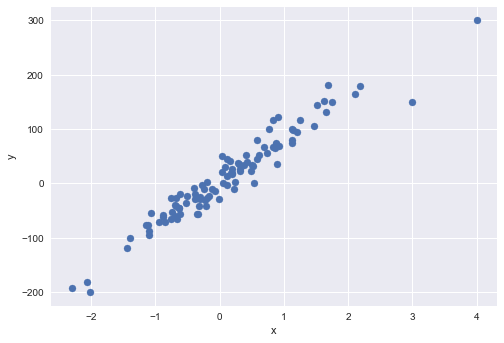

In [30]:
from sklearn.datasets import make_regression

# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

# 레버리지가 높은 가상의 데이터를 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [31]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           1.61e-61
Time:                        21:48:19   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

선형회귀 결과에서 get_influence 메서드를 호출하면 영향도 정보 객체를 구할 수 있다. 이 객체는 hat_matrix_diag 속성으로 레버리지 벡터를 가지고 있다.

<Container object of 3 artists>

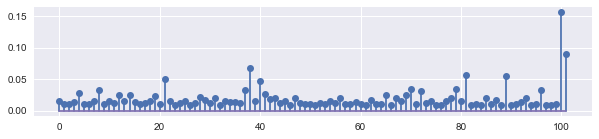

In [32]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

수동으로 추가한 두 개의 데이터를 제외하면 대부분의 데이터는 레버리지 값이 0.02 근처의 낮은 값을 가진다. 레버리지의 합이 2와 같아진다는 것도 다음과 같이 확인할 수 있다.

In [33]:
print("hat.sum() =", hat.sum())

hat.sum() = 2.0


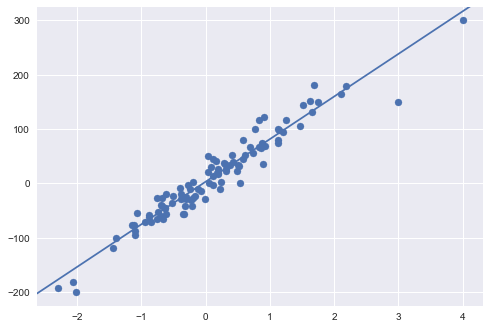

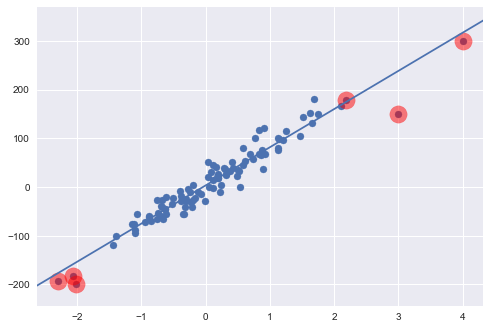

In [34]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

 데이터가 무리지어 있지 않고 단독으로 존재할수록 레버리지가 커짐

### 레버리지의 영향

레버리지가 큰 데이터는 포함되거나 포함되지 않는가에 따라 모형에 주는 영향이 큰 것을 알 수 있다.

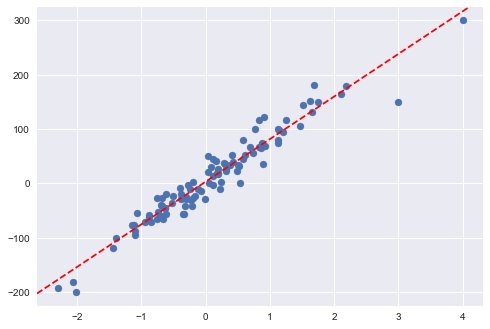

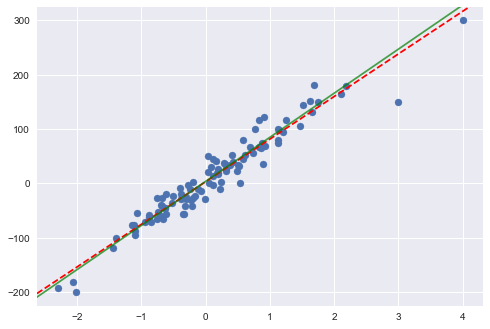

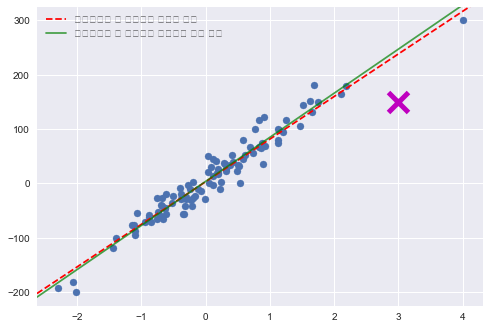

In [35]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2, c="g", alpha=0.7, ax=ax)

plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 큰 데이터를 포함한 경우", u"레버리지가 큰 데이터를 포함하지 않은 경우"], loc="upper left")
plt.show()

반대로 레버리지가 작은 데이터는 포함되거나 포함되지 않거나 모형이 별로 달라지지 않는 것을 알 수 있다.

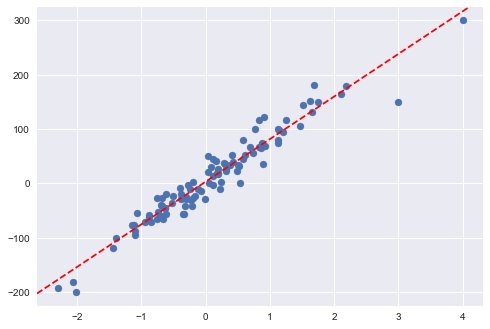

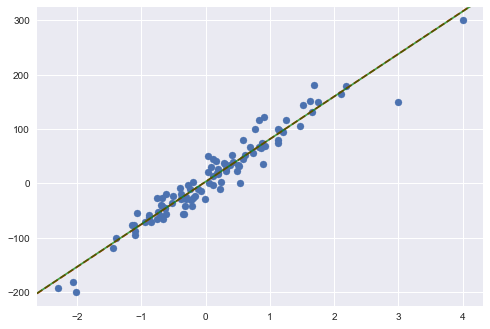

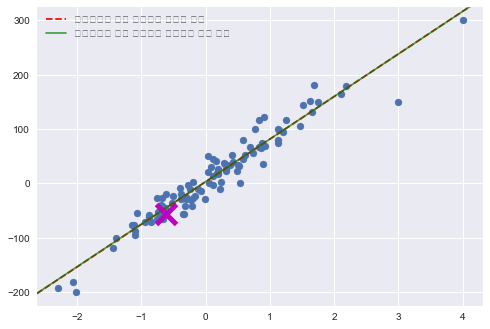

In [37]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3, c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 작은 데이터를 포함한 경우", u"레버리지가 작은 데이터를 포함하지 않은 경우"], loc="upper left")
plt.show()

## 아웃라이어(Outlier) 

* 아웃라이어(outlier): 모형에서 설명하고 있는 데이터와 동떨어진 값을 가지는 데이터

회귀 분석에는 잔차의 크기가 큰 데이터가 아웃라이어가 되는데 이 중에서도 주로 관심을 가지는 것은 레버리지와 잔차의 크기가 모두 큰 데이터들이다.

잔차는 RegressionResult 객체의 resid 속성 사용


<Container object of 3 artists>

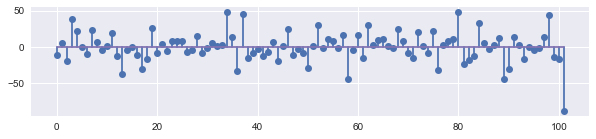

In [38]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

모든 데이터의 레버리지와 잔차를 동시에 보려면 plot_leverage_resid2 명령을 사용한다. 이 명령은 x축으로 (정규화된) 잔차의 제곱을 표시하고 y축으로 레버리지값을 표시한다. 데이터 아이디가 표시된 데이터들이 아웃라이어이다.

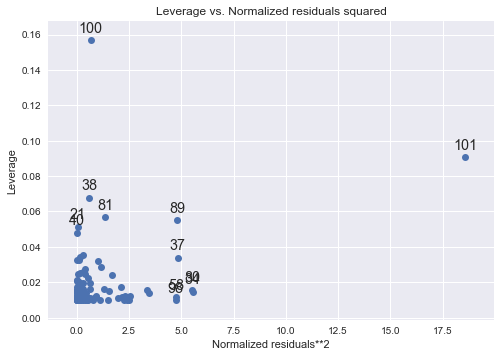

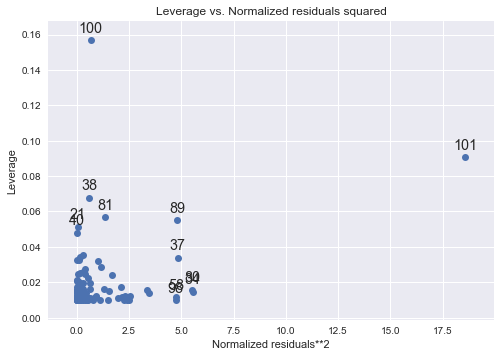

In [39]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

* Cook's Distance : 잔차와 레버리지를 동시에 보기위한 기준

레버리지가 커지거나 잔차의 크기가 커지면 Cook's Distance 값이 커진다.<br>
Fox' Outlier Recommendation 은 Cook's Distance가 다음과 같은 기준값보다 클 때 아웃라이어로 판단하자는 것이다.

influence_plot 명령을 사용, Cook's distance를 버블 크기로 표시

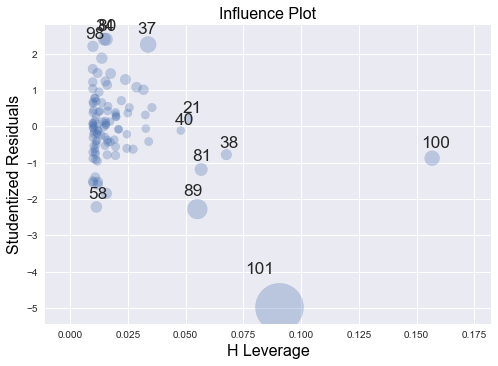

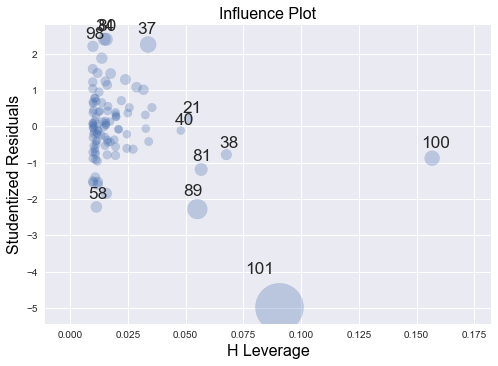

In [40]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

# 45절: 확률론적 선형회귀모형
확률론적 선형회귀모형

OLS(Ordinary Least Square) 방법을 사용하면 데이터에 대한 확률론적인 가정없이도 최적의 가중치를 계산할 수 있다. 그러나 이 경우에는 계산한 가중치가 어느 정도의 신뢰도 또는 안정성을 가지는지 확인할 수 있는 방법이 없다. 이를 확인하고자 하는 시도 중의 하나가 부트스트래핑(bootstrapping) 방법이다.

## 부트스트래핑

회귀 분석에 사용한 데이터가 달라진다면 회귀 분석의 결과는 어느 정도 영향을 받는지를 알기 위한 방법

데이터가 확률 변수로부터 생성된 표본이거나 혹은 더 큰 모집단 중에서 선택한 표본이라고 가정한다면 회귀 분석의 결과는 분석에 사용한 표본에 의존적이다. 만약 추가적인 다른 표본을 얻어서 다시 회귀분석에 사용한다면 회귀분석 결과 즉, 가중치 벡터의 값은 달라질 것이다. 

* 재표본화(re-sampling) : 기존의 D 개의 데이터에서 다시 D 개의 데이터를 선택하되 중복 선택도 가능하게 한다. (resampling with replacement)  이론적으로 $O(2^D)$ 수준의 새로운 표본 집단을 얻을 수 있다.



In [2]:
# 100개의 가상 데이터 생성 후 회귀분석

from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)

dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.params)

const    -1.628364
X1       42.853356
dtype: float64


데이터에서 중복을 허락하여 N개의 데이터를 선택한 후 다시 회귀 분석을 한다. 이론적으로 약  $2^{100}$ 개의 경우가 있지만 1,000번만 반복해 본다.

In [3]:
%%time 
N=1000
params_c = np.zeros(N)
params_x1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_c[i] = r.params.const
    params_x1[i] = r.params.X1

Wall time: 2.13 s


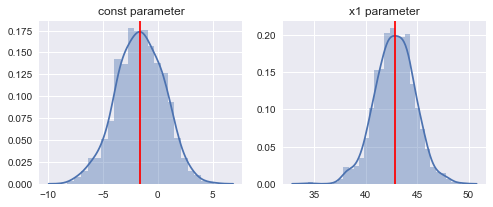

In [4]:
# 가중치 집합의 히스토그램

plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_c, ax=ax1)
plt.axvline(params_c.mean(), c='r')
plt.title("const parameter")

ax2 = plt.subplot(122)
sns.distplot(params_x1, ax=ax2)
plt.axvline(params_x1.mean(), c='r')
plt.title("x1 parameter")
plt.show()

In [5]:
# 평균, 분산 
params_c.mean(), params_c.std()
params_x1.mean(), params_x1.std()

(-1.6258808959173974, 2.1515656021184504)

(42.820587759382299, 1.9115015164522464)

가중치 중 상수항의 경우 평균은 -1.6이지만 표분 편차가 2보다 크기 때문에 값이 0일 가능성을 배제할 수 없다.

이 결과를 StatsModels 의 회귀 분석 보고서와 비교하자.

In [6]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           2.21e-36
Time:                        15:12:18   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

std err 항목을 보면 표준 편차의 경우 2.163 이고 마지막의 신뢰 구간(confidence interval)이 -5.920 ~ 2.663 임을 보이고 있다. 부트스트래핑으로 얻은 결과와 유사하다. 확률론적 가정에 의해 계산된 값이다.

## 확률론적 선형회귀모형

부트스트래핑 없이도 회귀분석 결과의 통계적 특성을 구할 수 있다.

y 가 확률 변수로부터 생성된 표본일 때 만족하는 조건들 
    1. 선형 정규분포 가정
        종속 변수 y 는 기댓값  wTx , 분산 σ2  를 가지는 조건부 정규분포 확률변수
        오차(disturbance)  ϵ=y−wTx 도 정규분포 확률변수
        종속변수가 정규분포
    2. 외생성 (Exogeneity) 가정
        오차 ϵ 와 독립 변수 x 는 서로 독립이다.
      가정과 앞의 선형 정규분포 가정을 결합
        E[ϵ]=0 은 x 의 값에 상관없이 유지된다.
        오차  ϵ 의 분산은 독립 변수 x 와 상관관계가 없다.
        공분산 행렬이  σ2 과 단위행렬의 곱이다.
    3. 조건부 독립 가정
        i 번째 데이터의 오차 ϵi 와 j 번째 데이터의 오차 ϵj 는 x 에 대해 서로 조건부 독립이다.
        오차들 끼리도 독립이여야 한다. 

y(종속변수)는 정규분포여야 한다. 

> x, y 중 그 어느 것도 그 자체로 정규 분포일 필요는 없다.


## MLE를 사용한 선형 회귀 분석

앞의 확률론적 선형회귀모형과 MLE(Maximum Likelihood Estimation)을 사용하여 가중치 벡터 w 의 값을 구해보자.


## 잔차의 분포

확률론적 선형회귀모형에 따르면 잔차  e=y−w^Tx  도 정규 분포를 따른다. 

즉, 잔차 e 는 오차 ϵ 의 선형 변환(linear transform)이다. 정규 분포의 선형 변환은 마찬가지로 정규 분포이므로 잔차도 정규 분포를 다른다.

## 회귀 계수의 표준 오차

가중치  w^  도 정규 분포 확률 변수인  y 의 선형 변환이므로 정규 분포를 따른다.

### 단일 계수 t-검정 (Single Coefficient t-test)

### Loss-of-Fit 검정 (회귀 분석 F-검정)

--- 뭔지 모르겠다....



# 46절: 입력변수가 카테고리값인 경우

## R 스타일 모형 정의
StatsModels 패키지는 통계분석과 관련된 R의 기능을 파이썬으로 옮겨오기 위한 패키지

patsy 패키지 이용

patsy 패키지의 dmatrix라는 명령을 사용하면 실험설계행렬(experiment design matrix)을 간단히 만들수 있다. dmatrix에 다음과 같이 모형 정의 문자열 formula와 원데이터 data을 입력하면 formula에서 지정한 대로 변환된 데이터 data_transformed를 출력한다.

dmatrix에서는 일반적인 수학 변환(transform)도 가능하다. numpy 함수 뿐 아니라 사용자 정의 함수와 다음과 같은 patsy 전용 함수도 사용할 수 있다.

- center(x): 평균 제거
- standardize(x): 평균 제거 및 표준편차로 스케일링
- scale(x): standardize(x) 과 같음


## 카테고리 변수 인코딩
데이터로 문자열이 오는 경우에는 카테고리 값으로 인정하여 One-Hot-Encoding 방식의 인코딩을 하게 된다.


In [8]:
from patsy import dmatrix

In [9]:
df3 = pd.DataFrame(["A", "B", "A", "C"], columns=["x3"])
df3
dmatrix("x3-1", data=df3)

,x3
0,A
1,B
2,A
3,C


DesignMatrix with shape (4, 3)
  x3[A]  x3[B]  x3[C]
      1      0      0
      0      1      0
      1      0      0
      0      0      1
  Terms:
    'x3' (columns 0:3)

카테고리 값이지만 정수 등으로 표시된 경우에는 C() 연산자를 이용하여 카테고리 값임을 지정할 수 있다.

In [10]:
df4 = pd.DataFrame([1, 1, 4, 2], columns=["x4"])
df4
dmatrix("C(x4) + 0", data=df4)

,x4
0,1
1,1
2,4
3,2


DesignMatrix with shape (4, 3)
  C(x4)[1]  C(x4)[2]  C(x4)[4]
         1         0         0
         1         0         0
         0         0         1
         0         1         0
  Terms:
    'C(x4)' (columns 0:3)

## OLS.from_formula 메서드

모형 정의 문자열을 사용할 수 있는 from_formula라는 메서드로  사용자가 데이터 행렬을 직접 정의하지 않고 모형 정의 문자열만으로 선형회귀모형을 만드는 것이 가능


In [18]:
data = {'x1':[10.212, 10.734, 10.642, 10.5421, 10.3211], 
        'x2':[6.331, 4.876, 8.787, 9.555, 3.332], 
        'y':[23, 20, 29, 29, 18]}
df = pd.DataFrame(data)
df

,x1,x2,y
0,10.2120,6.331,23
1,10.7340,4.876,20
2,10.6420,8.787,29
3,10.5421,9.555,29
4,10.3211,3.332,18


In [19]:
# 직접 데이터 행렬을 만드는 경우
dfy = df.iloc[:, -1]
dfX = sm.add_constant(df.iloc[:, :-1])
model1 = sm.OLS(dfy, dfX)

# 모형 정의 문자열을 사용하는 경우
model2 = sm.OLS.from_formula("y ~ x1 + x2", data=df)

In [20]:
print(model1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     57.40
Date:                Wed, 04 Oct 2017   Prob (F-statistic):             0.0171
Time:                        16:24:49   Log-Likelihood:                -4.4849
No. Observations:                   5   AIC:                             14.97
Df Residuals:                       2   BIC:                             13.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9944     23.281      0.472      0.6

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [21]:
print(model2.fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     57.40
Date:                Wed, 04 Oct 2017   Prob (F-statistic):             0.0171
Time:                        16:24:54   Log-Likelihood:                -4.4849
No. Observations:                   5   AIC:                             14.97
Df Residuals:                       2   BIC:                             13.80
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9944     23.281      0.472      0.6

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


# 47절: 예측성능의 진단과 비교

# 분산 분석

스케일이 달라지면 회귀분석과 상관없이 잔차제곱합도 달라진다.

분산 분석(ANOVA: Analysis of Variance): 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법, 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석 시 사용됨


## 분산 
    
모형 예측치의 움직임의 크기(분산)은 종속변수의 움직임의 크기(분산)보다 클 수 없다.

모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해
진다.

ESS는 모형에서 나온 예측값의 움직임의 범위, 
RSS는 잔차의 움직임의 범위, 즉 오차의 크기

## 결정계수(Coefficient of Determination)

모형의 성능을 나타내는 결정계수(Coefficient of Determination)  $R^2$

R2 가 0이라는 것은 오차의 분산 RSS가 최대이고 회귀분석 예측값의 분산 ESS가 0인 경우이므로 회귀분석 결과가 아무런 의미가 없다는 뜻이다.

반대로  R2 가 1이라는 것은 오차의 분산 RSS가 0이고 회귀분석 예측의 분산 ESS가 TSS와 같은 경우이므로 회귀분석 결과가 완벽하다는 뜻이다. 따라서 결정계수값은 회귀분석의 성능을 나타내는 수치라고 할 수 있다.

## 회귀 분석 F-검정과 분산 분석의 관계

분산 분석의 결과를 이용하여 회귀 분석 F-검정에 필요한 검정통계량을 구할 수 있다.

회귀 분석 F-검정의 원래 귀무 가설은 모든 계수  wi 가 0  이라는 것이지만 이 때는 모형이 아무런 의미가 없으므로 결정계수 값도 0이 된다.

수식의 결과는 F 분포를 따른다. 따라서 이 값을 회귀 분석 F-검정의 검정통계량으로 사용할 수 있다.

## 상수항이 없는 모형의 경우

모형에서 상수항을 지정하지 않은 경우에는 결정계수의 정의에 사용되는 TSS

실제 샘플평균과 상관없이  y¯= 이라는 가정하에 TSS를 계산 

결정계수의 값이 1보다 커지게 된다.

모형의 결정계수를 비교할 때 상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.

## F 검정을 이용한 모형 비교

F 검정을 이용하면 다음과 같이 포함관계(nesting)에 있는 두 모형의 성능을 비교

Full Model:
y=w0+w1x1+w2x2+w3x3

Reduced Model:
y=w0+w1x1
 
이 두 모형에 대해 F 검정을 실시하는 것은 다음과 같은 귀무 가설을 검정하는 것과 같다.

H0:w2=w3=0

In [22]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [23]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jhee\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jhee\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11082.941389,0.0,NaN,NaN,NaN
1,492.0,11080.276284,2.0,2.665105,0.05917,0.942554


## F 검정을 사용한 변수 중요도 비교

F 검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. 방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는 것과 같다.

anova_lm 명령에서는 typ=2로 지정하여 각 모형에서의 F 검정을 계산

In [24]:

model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jhee\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jhee\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,241.727993,10.733502,0.001126


In [25]:

model_boston = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,241.727993,1.0,10.733502,1.126402e-03
ZN,257.226157,1.0,11.421671,7.836070e-04
INDUS,2.591314,1.0,0.115063,7.345971e-01
NOX,488.605951,1.0,21.695680,4.117296e-06
RM,1865.902935,1.0,82.852108,2.207486e-18
AGE,0.072792,1.0,0.003232,9.546859e-01
DIS,1232.544417,1.0,54.728947,6.017651e-13
RAD,478.172457,1.0,21.232399,5.189664e-06
TAX,242.053549,1.0,10.747958,1.117826e-03
PTRATIO,1195.939414,1.0,53.103567,1.268218e-12


이 값은 단일 계수 t 검정의 유의확률과 동일하다. 그 이유는 다음과 같은 t 분포와 F 분포의 동치 성질 때문이다.

## CCPR 플롯
CCPR 플롯은 회귀 모형에서 특정한 하나의 변수의 영향을 살펴보기 위한 것이다.

# 회귀 분석 진단

확률론적 선형 회귀 분석의 기본 가정

가정 1. 종속 변수의 분포에 대한 가정
    
    선형 회귀 분석의 기본 가정은 종속 변수가 독립 변수의 선형 조합으로 결정되는 기댓값과 고정된 분산을 가지는 정규 분포라는 것
    
가정 2. 독립 변수에 대한 가정
    
    독립 변수의 공분산 행렬은 full rank 이어야 한다. 즉, 서로 독립인 성분이 독립 변수의 갯수만큼 존재해야 한다.
    
## 선형 회귀 모형 진단
    1. 잔차에 대한 정규성 검정
    2. 잔차에 대한 자기상관계수 검정
    3. 독립 변수에 대한 condition number 계산
    
## 기본 가정을 침해하는 문제들

### 이분산 문제

선형 회귀 모형에서는 종속 변수 값의 분산이 독립 변수의 값과 상관없이 고정된 값을 가져야한다. 그러나 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 이분산(heteroskedastic) 문제가 발생

이분산 문제를 해결하는 방법 주의 하나는 종속 변수를 log 변환하거나 box-cox 변환하는 것이다.

비정상 확률 과정을 정상 확률 과정으로 변환하기
https://datascienceschool.net/view-notebook/3f485c426a4b49fc9de95a02137ca6b4/

### 자기 상관 계수 문제

선형 회귀 모형에서는 오차(disturbance)들이 서로 (모수-조건부) 독립이라고 가정하고 있다. 따라서 잔차(residual)도 서로 독립이어야 한다. 만약 서로 독립이 아니라면 기본 선형 회귀 모형이 아닌 ARMA 모형 등의 시계열 모형을 사용해야 한다.

서로 독립인지는 잔차를 시계열로 가정하여 자기상관계수를 구한다. 독립 가정을 만족하면 시차(lag)가 0인 경우를 제외하고는 자기상관계수  ρl  이 0이어야 한다. 이를 검사하는 검증으로는 다음과 같은 것들이 있다.

- Box-Pierce 검정
- Ljung-Box 검정
- Durbin-Watson

잔차분석
https://datascienceschool.net/view-notebook/3ea68ac37aa846e58a8c330aad0bdbd1/

### 다중공선성 문제

독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다. 이는 독립 변수의 공분산 행렬이 full rank 이어야 한다는 조건을 침해한다.

독립 변수가 서로 의존하게 되면 이른바 과최적화(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해치게 된다. 이를 방지하는 방법들은 다음과 같다.

- 변수 선택법으로 의존적인 변수 삭제
- PCA(principal component analysis) 방법으로 의존적인 성분 삭제
- regularized 방법 사용

# 선형 회귀 모형 비교

- 조정 결정 계수 (Adjusted determination coefficient)
- AIC (Akaike Information Criterion)
- BIC (Bayesian Information Criterion)

## 조정 결정 계수

선형 회귀 모형에서 독립 변수가 추가되면 결정 계수의 값은 항상 증가한다.

## 정보량 규준
조정 결정 계수와 함께 많이 쓰이는 모형 비교 기준은 최대 우도에 독립 변수의 갯수에 대한 손실(penalty)분을 반영하는 방법이다. 이를 정보량 규준(information criterion)이라고 하며 손실 가중치의 계산 법에 따라 AIC (Akaike Information Criterion)와 BIC (Bayesian Information Criterion) 두 가지를 사용한다.

# 48절: 다항회귀와 과최적화
## 선형 기저 함수 모형

선형 기저 함수 모형(Linear Basis Function Models)은 x를 직접 선형 조합(linear combination)하지 않고 기저 함수를 통해 변환한 값을 새로운 독립 변수로 가정하고 선형 회귀 모형을 적용한 것과 같다. 따라서 기저 함수에 따라 가중치 벡터의 차원이 달라질 수 있다.

## 다항 회귀
다항 회귀는 다음과 같은 다항식 함수를 기저 함수로 사용하는 선형 기저 함수 모형의 일종이다.

## Scikit-Learn을 이용한 다항 회귀

Scikit-Learn에서는 preprocessing 서브 패키지의 PolynomialFeatures 클래스를 사용하여 다항 회귀를 할 수 있다.


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polyreg(degree, seed=0, plot=True):
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),
                      ("linear_regression", linear_regression)])

    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]

    model.fit(X, y)
    
    if plot:
        plt.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        plt.plot(xx, model.predict(xx[:, np.newaxis]))
        plt.ylim(-2, 2)
        plt.show()
    
    reg = model.named_steps["linear_regression"]
    return reg.coef_, reg.intercept_

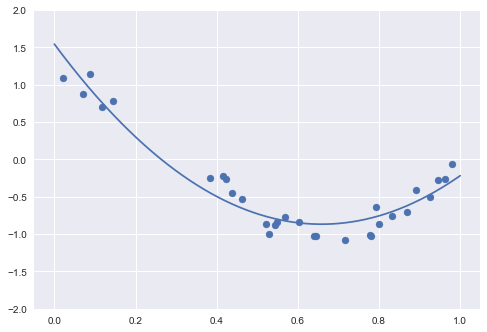

(array([ 0.        , -7.31956683,  5.55955392]), 1.5411486872392566)

In [27]:
polyreg(2)

## StatsModels를 이용한 다항 회귀

StatsModels에서는 OLS 클래스의 from_formula 메서드를 사용하여 다항 회귀를 할 수 있다.

In [28]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

In [30]:
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     289.3
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           4.40e-20
Time:                        17:21:21   Log-Likelihood:                 23.183
No. Observations:                  30   AIC:                            -38.37
Df Residuals:                      26   BIC:                            -32.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1694      0.094     12.418      0.0

## 과최적화
모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것
과최적화는

- 독립 변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나
- 독립 변수 데이터가 서로 독립이 아닌 경우에 발생한다.

이러한 상황에서는 같은 조건에 대해 답이 복수개 존재할 수 있기 때문이다.

과최적화가 문제가 되는 이유는 다음과 같다.

- 샘플이 조금만 변화해도 fitting 결과가 크게 달라지며
- 트레이닝에 사용되지 않은 새로운 독립 변수 값을 입력하면 오차가 커진다. (cross-validation 오차)

# 49절: 교차검증


## 모형 검증
모형의 모수 갯수를 증가시킨다든가 커널 모형, 신경망 모형과 같은 비선형 모형을 사용하게 되면 과최적화가 발생하여 트레이닝 데이터에 대한 예측 성능이 높아진다. 과최적화(overfitting)가 일어나면 트레이닝 데이터에 대해서는 예측이 잘되지만 테스트 데이터에 대해서는 예측 성능이 급격히 떨어지는 현상이 발생한다.

 모형의 최종 성능을 객관적으로 측정하려면 트레이닝에 사용되지 않은 새로운 데이터, 즉 검증(validation)용 혹은 테스트(test)용 데이터를 사용해서 예측한 결과를 기반으로 성능을 계산해야 한다.

## 교차 검증
여러가지 서로 다른 트레니인/테스트 데이터를 사용하여 복수의 테스트를 실시한 후 이 성능 자료로 부터 평균 성능(mean performance)과 성능 분산(performance variance)를 모두 구하는 것이 좋다.

이러한 테스트 방법을 교차 검증(cross validation)이라고 한다.


## Scikit-Learn의 교차 검증 기능

Scikit-Learn 의 model_selection 서브 패키지는 교차 검증을 위해 전체 데이터 셋에서 트레이닝용 데이터나 테스트용 데이터를 분리해 내는 여러가지 방법을 제공한다.

* data를 train set과 test set으로 단순 분리
    * data splitter
        * train_test_split() 명령

* 복수의 test set 준비
    * cross validation generator
        - KFold
        - LeaveOneOut
        - ShuffleSplit

* 복수의 test set 사용하여 평가 과정 반복
    - cross validation calculator
        - cross_val_score()
        
### 단순 데이터 분리

train_test_split() 명령은 데이터를 단순히 트레이닝 데이터와 테스트 데이터로 분리한다.

* 인수
    - arrays : 데이터
    - test_size : 테스트 데이터 사이즈
    - train_size : 사이즈
    - random_state : 난수 시드

* 반환값
    - 배열 리스트
    
## Cross-Validation


In [31]:
N = 5
X = np.arange(8 * N).reshape(-1, 2) * 10
y = np.hstack([np.ones(N), np.ones(N) * 2, np.ones(N) * 3, np.ones(N) * 4])
print("X:\n", X, sep="")
print("y:\n", y, sep="")

X:
[[  0  10]
 [ 20  30]
 [ 40  50]
 [ 60  70]
 [ 80  90]
 [100 110]
 [120 130]
 [140 150]
 [160 170]
 [180 190]
 [200 210]
 [220 230]
 [240 250]
 [260 270]
 [280 290]
 [300 310]
 [320 330]
 [340 350]
 [360 370]
 [380 390]]
y:
[ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.]


In [32]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    print("test index :", test_index)
    print("." * 80 )        
    print("train index:", train_index)
    print("=" * 80 )

test index : [ 1  6  8 10 17 18 19]
................................................................................
train index: [ 0  2  3  4  5  7  9 11 12 13 14 15 16]
test index : [ 2  4  5  7  9 13 14]
................................................................................
train index: [ 0  1  3  6  8 10 11 12 15 16 17 18 19]
test index : [ 0  3 11 12 15 16]
................................................................................
train index: [ 1  2  4  5  6  7  8  9 10 13 14 17 18 19]


## Leave-One-Out (LOO)

하나의 sample만을 test set으로 남긴다.

    from sklearn.model_selection import LeaveOneOut

    cv = LeaveOneOut()

    for train_index, test_index in cv.split(X):
        print("test X:", X[test_index])
        print("." * 80 )        
        print("test y:", y[test_index])
        print("=" * 80 )
        
 
## ShuffleSplit
중복된 데이터를 허용

    from sklearn.model_selection import ShuffleSplit

    cv = ShuffleSplit(n_splits=5, test_size=.5, random_state=0)

    for train_index, test_index in cv.split(X):
        print("test X:\n", X[test_index])
        print("=" * 20 )
        
## 교차 평가 시행    

CV는 단순히 데이터 셋을 나누는 역할을 수행할 뿐이다. 실제로 모형의 성능(편향 오차 및 분산)을 구하려면 이렇게 나누어진 데이터셋을 사용하여 평가를 반복하여야 한다. 이 과정을 자동화하는 명령이 cross_val_score() 이다.

* cross_val_score(estimator, X, y=None, scoring=None, cv=None)
    * cross validation iterator cv를 이용하여 X, y data 를 분할하고 estimator에 넣어서 scoring metric을 구하는 과정을 반복

* 인수
    * estimator : ‘fit’메서드가 제공되는 모형
    * X : 배열
        * 독립 변수 데이터
    * y : 배열
        * 종속 변수 데이터
    * scoring : 문자열
        * 성능 검증에 사용할 함수
    * cv : Cross Validator
        * None 이면 디폴트인 3-폴드 CV
        * 숫자 K 이면 K-폴드 CV
        * Cross Validator 클래스 객체

* 반환값
    * scores
        * 계산된 성능 값의 리스트


In [33]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = mean_squared_error(y_test, y_pred)

scores

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([ 301.58271911,  341.91498985,  410.58098438,  499.68109613,
        461.00979825,  384.106544  ,  434.90159273,  377.65506997,
        366.60959935,  371.14031438])

In [34]:

from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)

array([-301.58271911, -341.91498985, -410.58098438, -499.68109613,
       -461.00979825, -384.106544  , -434.90159273, -377.65506997,
       -366.60959935, -371.14031438])

# 50절: 정규화와 모형 최적화

# 정규화 선형회귀

정규화(regularized) 선형회귀 방법은 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

모형이 과도하게 최적화되면 모형 계수의 크기도 과도하게 증가하는 경향이 나타난다. 따라서 정규화 방법에서 추가하는 제약 조건은 일반적으로 계수의 크기를 제한하는 방법이다. 일반적으로 다음과 같은 세가지 방법이 사용된다.

- Ridge 회귀 모형
- Lasso 회귀 모형
- Elastic Net 회귀 모형

## Ridge 회귀 모형
Ridge 회귀 모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

λ 는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다.  λ 가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다. λ 가 작아지면 정규화 정도가 작아지며  λ  가 0이 되면 일반적인 선형 회귀 모형이 된다.


## Lasso 회귀 모형
Lasso(Least Absolute Shrinkage and Selection Operator) 회귀 모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.


## Elastic Net 회귀 모형
Elastic Net 회귀 모형은 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.

## statsmodels의 정규화 회귀 모형
statsmodels 패키지는 OLS 선형 회귀 모형 클래스의 fit_regularized 메서드를 사용하여 Elastic Net 모형 계수를 구할 수 있다.


## Scikit-Learn의 정규화 회귀 모형

Scikit-Learn 패키지에서는 정규화 회귀 모형을 위한 Ridge, Lasso, ElasticNet 이라는 별도의 클래스를 제공한다. 

### 정규화 모형의 장점
정규화 모형은 회귀 분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않도록 한다.

## Ridge 모형과 Lasso 모형의 차이

Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.

## path 메서드

Lasso 와 ElasticNet 클래스는 하이퍼 모수 alpha 값의 변화에 따른 계수의 변화를 자동으로 계산하는 path 메서드를 제공한다. lasso_path(), enet_path() 명령어도 path 메서드와 동일한 기능을 수행한다.



# 최적 정규화


## 다항 회귀의 차수 결정
